# Exercise 7

Name: B.S.V.W. Munasinghe

Index Number: 190397E

In [1]:
#Importing Libraries
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import cv2 as cv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

# 1) 

Text(0.5, 0, 'z')

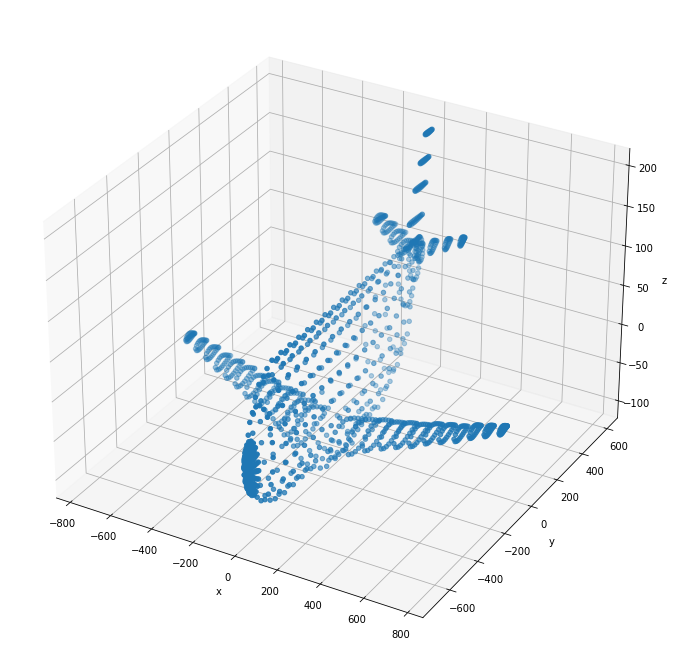

In [2]:
from plyfile import PlyData,PlyElement
pcd = PlyData.read('airplane.ply')
assert pcd is not None

points = np.concatenate((pcd['vertex']['x'].reshape(1,-1),pcd['vertex']['y'].reshape(1,-1),pcd['vertex']['z'].reshape(1,-1)),axis=0)
points = points-np.mean(points,axis=1).reshape(3,1)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(points[0,:],points[1,:],points[2,:])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


<function matplotlib.pyplot.show(close=None, block=None)>

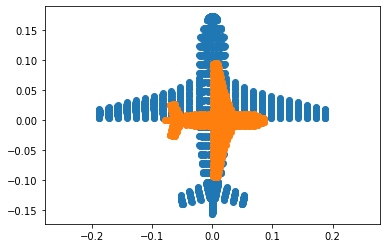

In [3]:
ones = np.ones((1,points.shape[1]))
X = np.concatenate((points,ones),axis = 0)

R = np.array([[1,0,0],[0,1,0],[0,0,1]])
K = np.array([[1,0,0],[0,1,0],[0,0,1]])
T = np.array([[0],[0],[-4000]])

p1=K @ np.concatenate((R,T),axis=1)

x1  = p1 @ X
x1=x1/x1[2,:]


R = np.array([[0,1,0],[1,0,0],[0,0,1]])
K = np.array([[0.5,0,0],[0,0.5,0],[0,0,1]])
T = np.array([[0],[0],[-4000]])

p2=K @ np.concatenate((R,T),axis=1)

x2  = p2 @ X
x2=x2/x2[2,:]

fig,ax = plt.subplots(1,1,sharex=True,sharey=True)
ax.scatter(x1[0,:],x1[1,:])
ax.scatter(x2[0,:],x2[1,:])
ax.axis('equal')
plt.show
  


# 2)

# 3)

Item 1 area in pixels = 59143
Item 1 area in pixels = 2318.642172
Item 2 area in pixels = 59211
Item 2 area in pixels = 2321.3080440000003


Text(0.5, 1.0, 'Color Mapped Image')

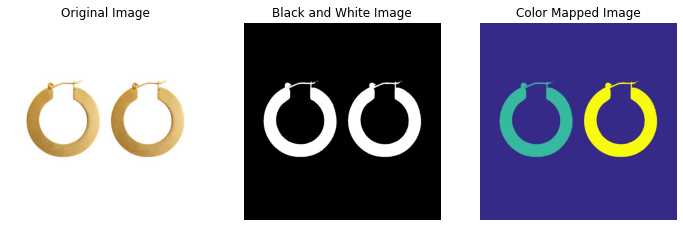

In [7]:
im=cv.imread('earrings.jpg',cv.IMREAD_COLOR)
assert im is not None

hsv = cv.cvtColor(im,cv.COLOR_BGR2HSV)
th,bw = cv.threshold(hsv[:,:,1],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# remove dots 
w=5
kernel = np.ones((w,w),np.uint8)
opened = cv.morphologyEx(bw,cv.MORPH_CLOSE,kernel)

retval , labels,stats,centroids = cv.connectedComponentsWithStats(bw)
colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'),cv.COLORMAP_PARULA) 

Z = 720
f = 8

for i,s in enumerate(stats):
    if i!=0:
        print('Item',i,'area in pixels =',s[4])
        print('Item',i,'area in pixels =',s[4]*(2.2e-3)**2*(Z*Z)/(f*f))

fig,ax = plt.subplots(1,3,figsize=(12,12))
f_ = cv.cvtColor(im,cv.COLOR_BGR2RGB)
ax[0].axis('off')
ax[0].imshow(f_)
ax[0].set_title("Original Image")

f_ = cv.cvtColor(bw,cv.COLOR_BGR2RGB)
ax[1].axis('off')
ax[1].imshow(f_)
ax[1].set_title("Black and White Image")

f_ = cv.cvtColor(colormapped,cv.COLOR_BGR2RGB)
ax[2].axis('off')
ax[2].imshow(f_)
ax[2].set_title("Color Mapped Image")

# 4)

(0, 0, 0, 0)


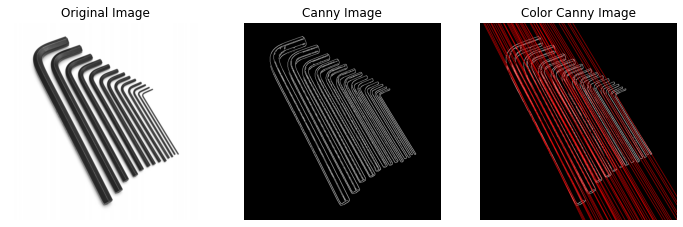

In [17]:

file_name = 'allenkeys.jpg'  
im = cv.imread ( file_name , cv.IMREAD_REDUCED_GRAYSCALE_2)
canny = cv.Canny( im, 50 , 150)

 # Copy edges to the images that will display the r e sul t s in BGR
canny_color = cv.cvtColor ( canny , cv.COLOR_GRAY2BGR)

lines = cv.HoughLines ( canny , 1 , np.pi / 180 , 170 , None , 0 , 0)

if lines is not None :
    for i in range (0 , len ( lines ) ) :
        rho = lines [ i ] [ 0 ] [ 0 ]
        theta = lines [ i ] [ 0 ] [ 1 ]
        a = np.cos ( theta )
        b = np.sin ( theta )
        x0 = a * rho
        y0 = b * rho
        pt1 = ( int ( x0 + 1000*(-b ) ) , int ( y0 + 1000*(a ) ) )
        pt2 = ( int ( x0 - 1000*(-b ) ) , int ( y0 - 1000*(a ) ) )
        cv.line ( canny_color , pt1 , pt2 , (0 ,0 ,255) , 1 , cv.LINE_AA)

cv.namedWindow( 'Image'   , cv.WINDOW_AUTOSIZE)
cv.imshow( 'Image' , im)
cv.waitKey ( 0 )
cv.imshow( 'Image' , canny )
cv.waitKey ( 0 )
cv.imshow( 'Image' , canny_color )

fig,ax = plt.subplots(1,3,figsize=(12,12))
f_ = cv.cvtColor(im,cv.COLOR_BGR2RGB)
ax[0].axis('off')
ax[0].imshow(f_)
ax[0].set_title("Original Image")

f_ = cv.cvtColor(canny,cv.COLOR_BGR2RGB)
ax[1].axis('off')
ax[1].imshow(f_)
ax[1].set_title("Canny Image")

f_ = cv.cvtColor(canny_color,cv.COLOR_BGR2RGB)
ax[2].axis('off')
ax[2].imshow(f_)
ax[2].set_title("Color Canny Image")

r = cv.selectROI ( 'Image' , canny_color , showCrosshair = True , fromCenter = False )
cv.waitKey ( 0 )
print ( r )

x0 , y0 = int ( r[ 0 ] + r[ 2 ] / 2 ) , int ( r [ 1 ] + r [ 3 ] / 2 )
m = b / a # Gradient
m = np.tan (np.median ( lines [ : , 0 ,1] ) )
c = y0 = m*x0 # Inter cept
cv.line ( canny_color , (0 , int ( c ) ) , ( im.shape [ 0 ] , int (m*im.shape [ 0 ] + c ) ) , (0 ,255 ,0) , 2 , cv.LINE_AA)
cv.imshow( 'Image' , canny_color )
cv.waitKey ( 0 )
cv.destroyAllWindows ( )
dy = 1
y_sub_pixel = np.arange (0 , im.shape [ 0 ] - 1 , dy )
f_sub_pixel = np.zeros_like ( y_sub_pixel )
f_sub_pixel_nn = np.zeros_like ( y_sub_pixel )
# https : / / youtu . be / v9CFu4r6tPY


for i , y in enumerate ( y_sub_pixel ) :
    # Your code hear to generate the pixe l values along the l ine
    pass
# fig , ax = plt.subplots ( figsize =(30 ,5) )
# ax.plot ( f_sub_pixel_nn )
# Your code hear to compute the widths . Keep in mind of the angle
